<a href="https://colab.research.google.com/github/kosukeshirane/-Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas

陸上競技(今回は100と200)の自己タイムの管理のためのプログラム



これまでのタイムの記録の例

In [46]:
import pandas as pd
from decimal import Decimal
df = pd.DataFrame([ ['4/5','100', Decimal('11.84'), 1.2, 1], ['4/11','100', Decimal('11.92'), 1.2, 2],['4/11','200', Decimal('24.21'), 1.2, 1], ['4/25','100', Decimal('11.81'), 2.1, 3], ['5/16','100', Decimal('11.84'), -0.3, 4],['5/16', '200', Decimal('24.30'),-0.2, 2] ])
df.columns = ['日付', '種目','タイム', '風速','何試合目']
df

,日付,種目,タイム,風速,何試合目
0,4/5,100,11.84,1.2,1
1,4/11,100,11.92,1.2,2
2,4/11,200,24.21,1.2,1
3,4/25,100,11.81,2.1,3
4,5/16,100,11.84,-0.3,4
5,5/16,200,24.30,-0.2,2


新しい日付,種目,タイム,風速,試合数の追加

In [47]:
a=input('日付は？')
b=str(input('種目は？'))
c=Decimal(input('タイムは？'))
d=Decimal(input('風速は？'))
e=df[df['種目']==b].shape[0]+1
best=df[(df['種目']==b) & (df['風速']<2.1)]['タイム'].min()
if d<=2:
  if c < best:
    print('自己ベストです')
  elif c == best:
    print('自己ベストタイです')
  else:
    x=c-best
    print('自己ベストまで、あと'+str(x)+'です')
else:
  if c < best:
    print('自己ベストです(追い風参考)')
  elif c == best:
    print('自己ベストタイです(追い風参考)')
  else:
    x=c-best
    print('自己ベストまで、あと'+str(x)+'です(追い風参考)')
df = df.append( {'日付':a, '種目':b, 'タイム':c, '風速':d, '何試合目':e}, ignore_index=True )
df

日付は？6/14
種目は？100
タイムは？11.78
風速は？0.7
自己ベストです


,日付,種目,タイム,風速,何試合目
0,4/5,100,11.84,1.2,1
1,4/11,100,11.92,1.2,2
2,4/11,200,24.21,1.2,1
3,4/25,100,11.81,2.1,3
4,5/16,100,11.84,-0.3,4
5,5/16,200,24.30,-0.2,2
6,6/14,100,11.78,0.7,5


これまでのタイムの種目ごとのランキング化

In [48]:
syumoku=input('ランキング化する種目は？')
df_syumoku=df[df['種目']==syumoku]
df_time_wind = df_syumoku.sort_values(['タイム', '風速'])
df_time_wind

ランキング化する種目は？200


,日付,種目,タイム,風速,何試合目
2,4/11,200,24.21,1.2,1
5,5/16,200,24.30,-0.2,2


種目ごとのタイム推移のグラフ

グラフ化する種目は？200


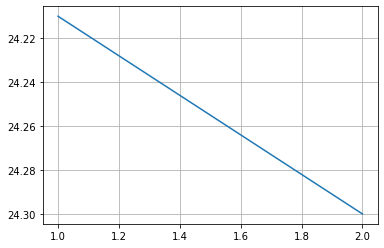

In [50]:
import numpy as np
from matplotlib import pyplot as plt
syu=input('グラフ化する種目は？')
df_syu=df[df['種目']==syu]
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.plot(df_syu['何試合目'],df_syu['タイム'])
ax.grid()
plt.show()